In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
# Title: Titanic Dataset Exploratory Data Analysis
# Name: Faith Mwende Muli

# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Titanic dataset

In [3]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Understand the data

In [4]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()

Shape of dataset: (418, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Check for missing values

In [5]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Visualize missing values

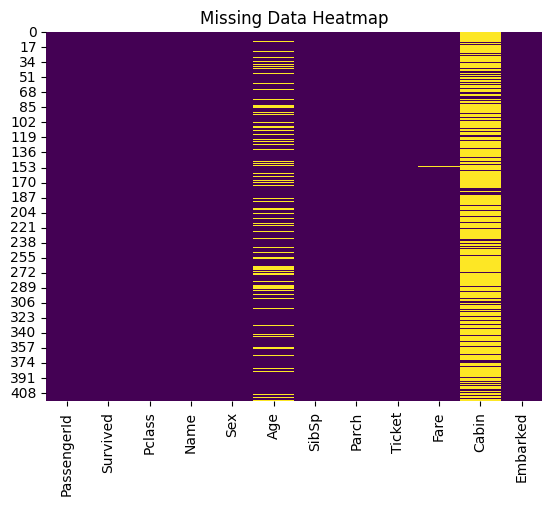

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

Univariate analysis

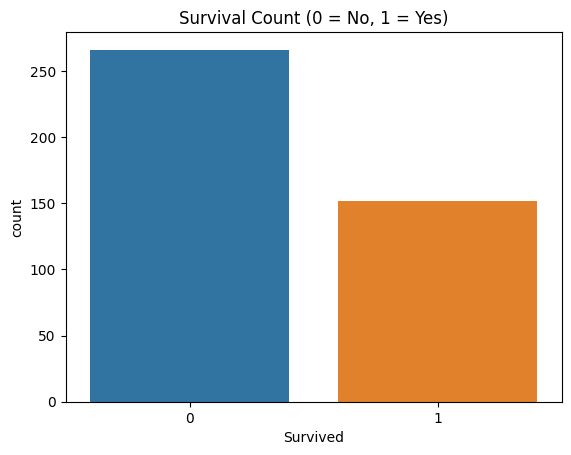

In [7]:
# Survival Count
sns.countplot(data=df, x='Survived')
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

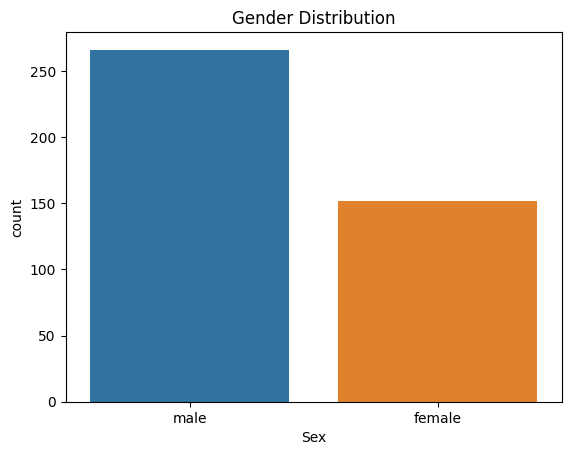

In [8]:
# Gender Distribution
sns.countplot(data=df, x='Sex')
plt.title("Gender Distribution")
plt.show()

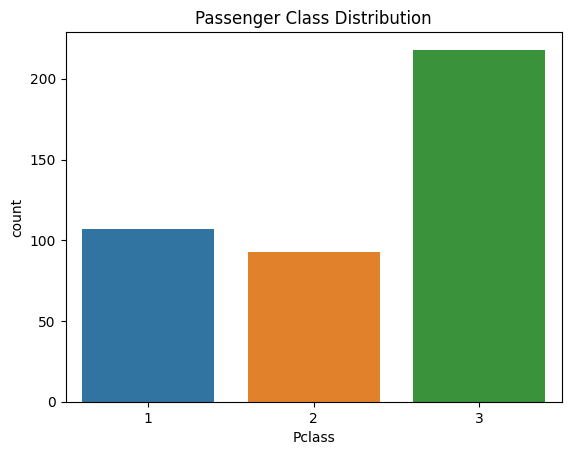

In [9]:
# Passenger Class
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

Bivariate analysis

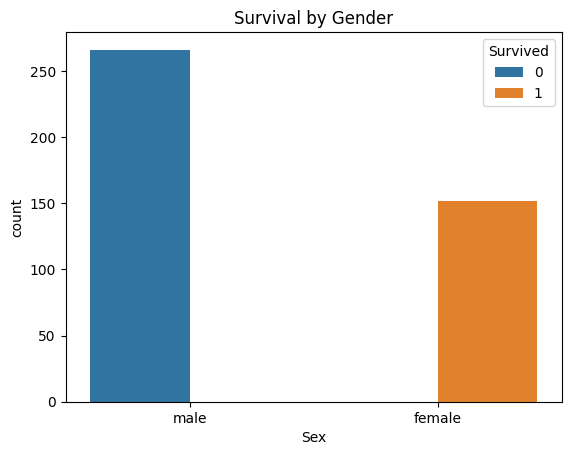

In [10]:
# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

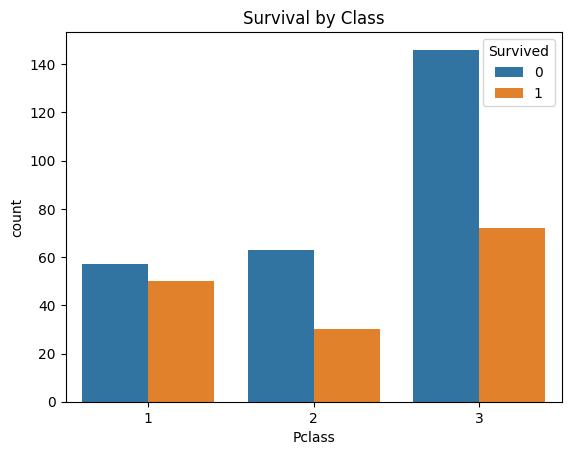

In [11]:
# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


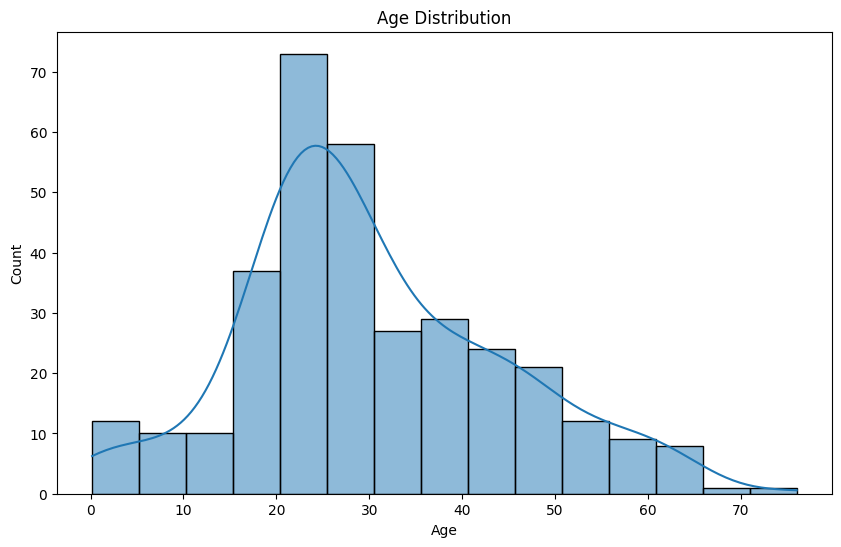

In [12]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


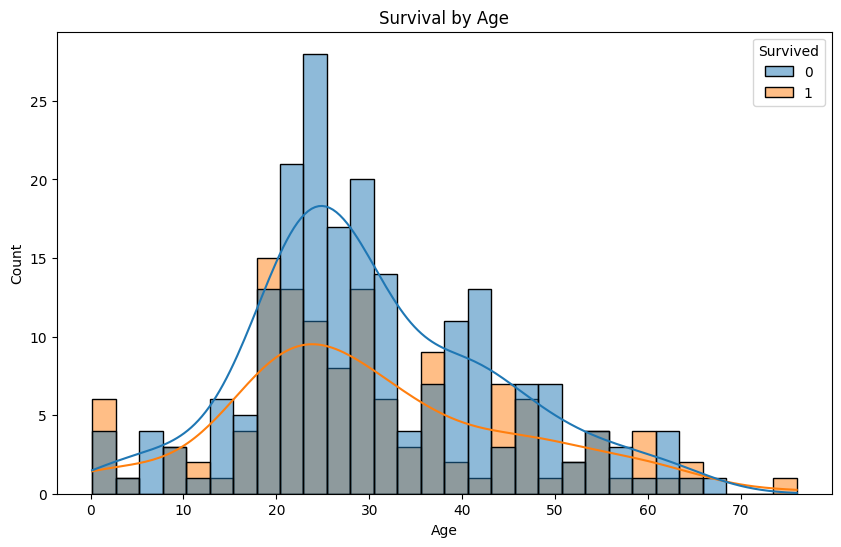

In [13]:
# Age vs Survival
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Survival by Age")
plt.show()

Correlation heatmap

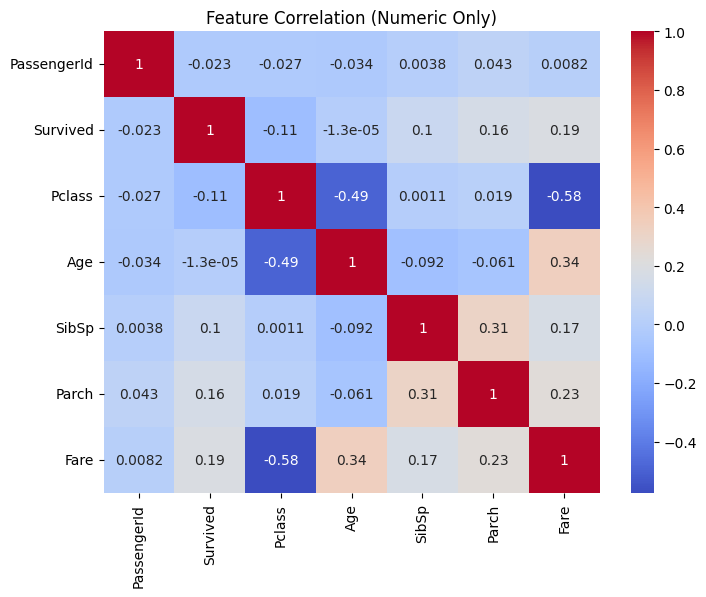

In [14]:
# 8. Correlation Heatmap (only numeric columns)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include='number')  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Only)")
plt.show()


Clean up

In [15]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [16]:
# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
# Drop 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


Export the cleaned dataset

In [18]:
df.to_csv('/kaggle/working/cleaned_titanic.csv', index=False)